<a href="https://colab.research.google.com/github/eckoecho/CodingDojo/blob/week-7/Dealing_with_Unbalanced_Classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_sampler_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [22]:
#Load Data
fpath = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week07/Data/credit_card_fraud_dataset.csv"
df = pd.read_csv(fpath)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,154903,2.051787,-0.187022,-1.103035,0.426225,-0.269518,-1.170855,0.051066,-0.209313,0.806213,...,-0.303489,-0.819563,0.367881,-0.061352,-0.373009,0.206934,-0.079089,-0.064241,1.98,0
1,118132,-1.097036,-0.233782,-0.096022,-0.372325,2.434854,-1.393347,0.305382,-0.077793,-0.231507,...,0.207111,0.249741,-0.434478,-1.140822,1.381077,0.108243,-0.156596,-0.087092,21.23,0
2,5997,-1.451863,-0.924715,1.712229,-1.802891,0.176939,-1.201854,0.146044,0.055134,2.690959,...,0.007895,0.017067,0.183088,0.355935,0.284810,-0.131321,-0.017971,0.103671,115.59,0
3,138313,-0.748073,-1.209636,0.887484,-1.655591,-0.065690,0.957387,0.277554,0.327990,-0.835489,...,0.077620,-0.161395,0.725481,-1.080008,-0.305991,-0.477772,-0.028670,-0.003467,229.54,0
4,58067,-0.264869,3.386140,-3.454997,4.367629,3.336060,-2.053918,0.256890,-2.957235,-2.855797,...,-1.394504,-0.166029,-1.452081,-0.251815,1.243461,0.452787,0.132218,0.424599,1.00,1


#Identify Class Imbalance

In [23]:
from sklearn.metrics.pairwise import normalize
#Check class balance of Target!
df["Class"].value_counts(normalize=True)

0    0.99814
1    0.00186
Name: Class, dtype: float64

# Train Test Split

In [24]:
#Train test split
X = df.drop(columns="Class")
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
98980,163535,-3.402013,-1.959230,1.697897,-0.574571,1.578118,-0.738203,-1.227197,0.411773,0.754016,...,-0.286165,0.189637,0.463070,-1.262695,0.383015,0.348424,-0.329037,-0.187887,-0.507150,6.13
69824,169909,-2.922929,2.743307,-0.231333,-1.303000,0.154896,-1.154229,1.012886,-0.111809,1.653644,...,1.216176,-0.575031,-0.830700,-0.054742,-0.043275,0.386639,0.251902,1.204820,0.855432,4.45
9928,128093,1.895663,-0.306936,-0.159864,1.428735,-0.664095,-0.278637,-0.562491,0.021668,1.161200,...,-0.234903,0.214282,0.801253,0.098965,-0.095154,-0.067988,-0.524432,0.061929,-0.028136,29.40
75599,119058,-9.937069,-11.130076,1.113445,2.814744,8.642702,-5.343725,-3.153987,0.394385,0.604094,...,-0.515316,-0.787200,-1.132521,6.475687,0.349284,2.232933,-0.895669,0.415665,0.234681,20.00
95621,157820,-1.107827,0.818007,1.234411,-1.330788,1.058813,-0.716022,1.184026,-0.194653,-0.324784,...,-0.176013,0.170286,0.593383,-0.620247,1.205631,1.141304,0.598097,-0.192605,0.034651,3.07


# Baseline Model


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24955
           1       0.91      0.69      0.78        45

    accuracy                           1.00     25000
   macro avg       0.96      0.84      0.89     25000
weighted avg       1.00      1.00      1.00     25000



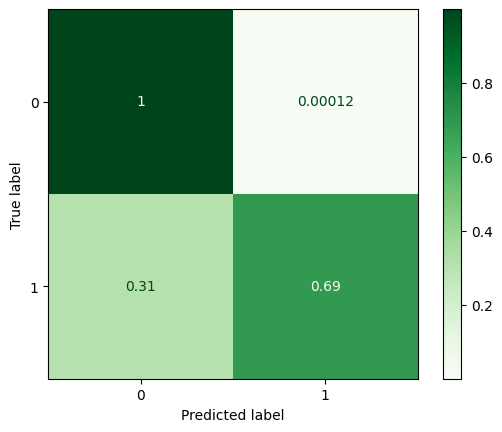

In [25]:
#Create a baseline model pipeline
log_reg = LogisticRegression(max_iter=1000)
scaler = StandardScaler()
log_reg_pipe = make_pipeline(scaler, log_reg)
#Fit and evaluate the baseline model pipeline
log_reg_pipe.fit(X_train, y_train)
train_preds = log_reg_pipe.predict(X_train)
test_preds = log_reg_pipe.predict(X_test)
print(classification_report(y_test, test_preds))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize="true", cmap="Greens");

# Class Weights

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     24955
           1       0.07      0.96      0.13        45

    accuracy                           0.98     25000
   macro avg       0.53      0.97      0.56     25000
weighted avg       1.00      0.98      0.99     25000



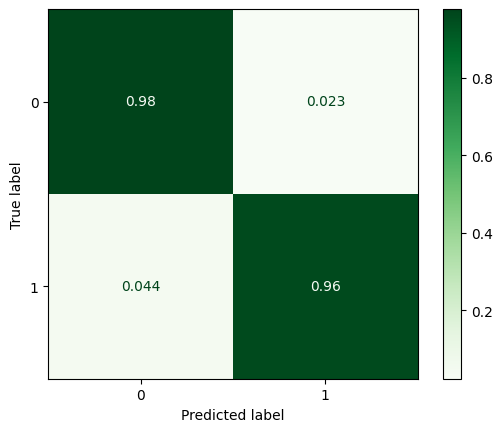

In [26]:
#Instantiate the pipeline with the scaler and weighted model
log_reg_weighted = LogisticRegression(max_iter=1000, class_weight="balanced")
scaler = StandardScaler()
log_reg_weighted_pipe = make_pipeline(scaler, log_reg_weighted)
#Fit and evaluate the model
log_reg_weighted_pipe.fit(X_train, y_train)
test_preds = log_reg_weighted_pipe.predict(X_test)
print(classification_report(y_test, test_preds))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize="true", cmap="Greens");

# Random Undersampling


In [27]:
#create scaler and under sampler pipeline
under_sampler = RandomUnderSampler()
scaler = StandardScaler()
under_sample_pipe = make_sampler_pipeline(scaler, under_sampler)
#Compare the shape and value counts of the remaining data.
X_train_under, y_train_under = under_sample_pipe.fit_resample(X_train, y_train)
print("Original X_train class balance")
print(y_train.value_counts())
print("\nUndersampled X_train_under class balance")
y_train_under = pd.Series(y_train_under)
print(y_train_under.value_counts())

Original X_train class balance
0    74859
1      141
Name: Class, dtype: int64

Undersampled X_train_under class balance
0    141
1    141
Name: Class, dtype: int64


## Testing New Balanced Class

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     24955
           1       0.03      0.98      0.05        45

    accuracy                           0.93     25000
   macro avg       0.51      0.95      0.51     25000
weighted avg       1.00      0.93      0.96     25000



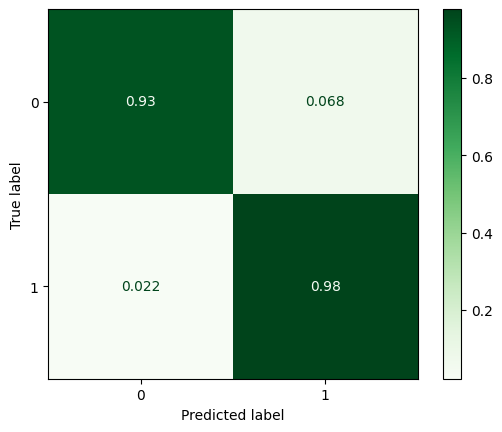

In [28]:
#create the pipeline
log_reg_under = LogisticRegression(max_iter=1000)
under_sample_log_reg_pipe = make_sampler_pipeline(scaler, under_sampler, log_reg_under)
#Fit and evaluate the model
under_sample_log_reg_pipe.fit(X_train, y_train)
test_preds = under_sample_log_reg_pipe.predict(X_test)
print(classification_report(y_test, test_preds))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize="true", cmap="Greens")

# Random Oversampling

In [29]:
#Create an oversampling pipeline
over_sampler = RandomOverSampler()
over_sample_pipe = make_sampler_pipeline(scaler, over_sampler)
#Scale and oversample the data.
X_train_over, y_train_over = over_sample_pipe.fit_resample(X_train, y_train)
#Explore the sresampled data
print("Original X_train Class balance")
print(y_train.value_counts())
print("\nOverSampled X_train_over class balance")
y_train_over = pd.Series(y_train_over)
print(y_train_over.value_counts())

Original X_train Class balance
0    74859
1      141
Name: Class, dtype: int64

OverSampled X_train_over class balance
0    74859
1    74859
Name: Class, dtype: int64


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     24955
           1       0.07      0.96      0.13        45

    accuracy                           0.98     25000
   macro avg       0.53      0.97      0.56     25000
weighted avg       1.00      0.98      0.99     25000



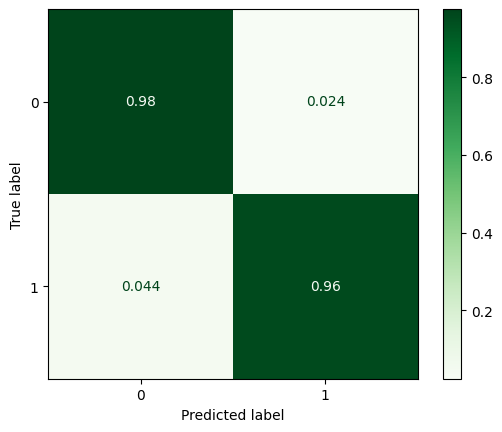

In [30]:
#Create an oversampling pipeline
log_reg_over = LogisticRegression(max_iter=1000)
over_sample_log_reg_pipe = make_sampler_pipeline(scaler, over_sampler, log_reg_over)
#Fit and evaluate the model
over_sample_log_reg_pipe.fit(X_train, y_train)
test_preds = over_sample_log_reg_pipe.predict(X_test)
print(classification_report(y_test, test_preds))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize="true", cmap="Greens");

# SMOTE

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     24955
           1       0.06      0.96      0.11        45

    accuracy                           0.97     25000
   macro avg       0.53      0.96      0.55     25000
weighted avg       1.00      0.97      0.98     25000



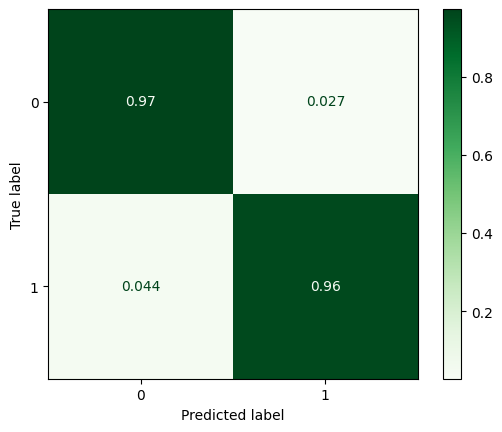

In [31]:
#Create model pipeline with scaler, SMOTE, and model
smote = SMOTE()
log_reg_smote = LogisticRegression(max_iter=1000)
log_reg_smote_pipe = make_sampler_pipeline(scaler, smote, log_reg_smote)
#Fit and evaluate the model pipeline
log_reg_smote_pipe.fit(X_train, y_train)
test_preds = log_reg_smote_pipe.predict(X_test)
print(classification_report(y_test, test_preds))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize="true", cmap="Greens");